# Network Community Detection

## Karate Club Problem

Network representation

In [1]:
from QHyper.problems.community_detection import KarateClubNetwork


RESOLUTION = 0.5

karate_club_network = KarateClubNetwork(resolution=RESOLUTION)

Louvain community detection algorithm (networkx impl.)

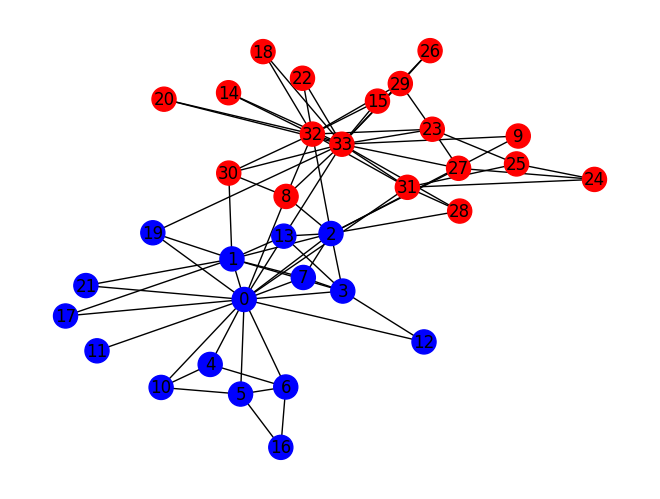

In [2]:
from networkx import community as nx_comm
import networkx as nx


lcda_communities = nx_comm.louvain_communities(
    karate_club_network.graph, seed=5345, resolution=RESOLUTION
)  # seed=None

color_map = []
for node in karate_club_network.graph:
    if node in lcda_communities[0]:
        color_map.append("blue")
    else:
        color_map.append("red")

nx.draw(karate_club_network.graph, node_color=color_map, with_labels=True)

### Create Community Detection Problem instance

In [3]:
from QHyper.problems.community_detection import CommunityDetectionProblem


karate_problem = CommunityDetectionProblem(
    karate_club_network, communities=2
)

##### DQM

In [12]:
from QHyper.solvers.dqm import DQM


karate_dqm = DQM(karate_problem, time=5)
karate_sampleset_dqm = karate_dqm.solve()

In [13]:
karate_dqm_sample = karate_sampleset_dqm.first

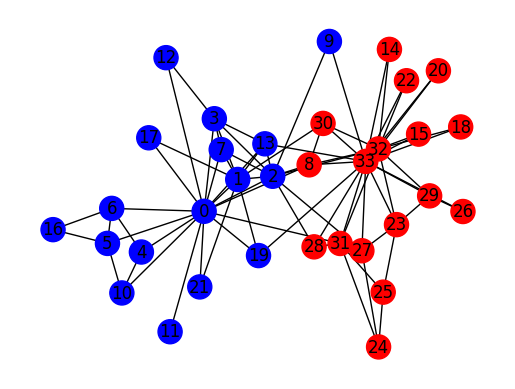

In [14]:
from demo.network_community_detection.utils.utils import draw_communities


folder = "./network_community_detection/demo_output"
data_name = "karate_club"
path = f"{folder}/{data_name}.png"

draw_communities(karate_problem, karate_dqm_sample.sample, path)

Differences with Louvain algorithm

In [15]:
def communities_from_sample(sample, N_communities: int) -> set:
    communities = []
    for k in range(N_communities):
        comm = []
        for i in sample:
            if sample[i] == k:
                comm.append(i)
        communities.append(set(comm))

    return communities

In [16]:
karate_communities_dqm = communities_from_sample(karate_dqm_sample.sample, 2)

lcda_communities_xs = [
    {"x" + str(n) for n in cluster} for cluster in lcda_communities
]

print("\nLCDA")
print(f"comm. 0: {lcda_communities_xs[0]}")
print(f"comm. 1: {lcda_communities_xs[1]}")

print("\nDQM")
print(f"comm. 0: {karate_communities_dqm[0]}")
print(f"comm. 1: {karate_communities_dqm[1]}")

print("\nDiff.:")
print(karate_communities_dqm[0].difference(lcda_communities_xs[0]))
# print(karate_communities_dqm[1].difference(lcda_communities_xs[0]))


LCDA
comm. 0: {'x3', 'x4', 'x17', 'x2', 'x16', 'x0', 'x13', 'x19', 'x21', 'x1', 'x11', 'x6', 'x5', 'x12', 'x10', 'x7'}
comm. 1: {'x22', 'x27', 'x25', 'x24', 'x29', 'x32', 'x26', 'x18', 'x8', 'x9', 'x23', 'x14', 'x28', 'x20', 'x30', 'x31', 'x33', 'x15'}

DQM
comm. 0: {'x3', 'x4', 'x17', 'x2', 'x16', 'x0', 'x13', 'x19', 'x21', 'x1', 'x11', 'x9', 'x6', 'x5', 'x12', 'x10', 'x7'}
comm. 1: {'x22', 'x27', 'x25', 'x24', 'x29', 'x32', 'x26', 'x18', 'x8', 'x28', 'x23', 'x14', 'x30', 'x20', 'x33', 'x31', 'x15'}

Diff.:
{'x9'}


In [17]:
from demo.network_community_detection.utils.utils import (
    ResultsFrame,
    draw_communities,
)


nodes = karate_problem.G.nodes
values = [
    list(karate_dqm_sample.sample.values()),
    ResultsFrame()
    .louvain_communities_to_sample_like(lcda_communities)
    .values(),
]
values = [values[0], [abs(1 - x) for x in values[1]]]

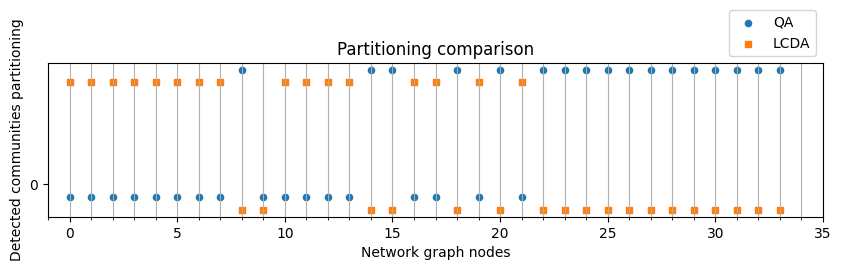

In [18]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt


f, ax = plt.subplots(1, 1, figsize=(10, 2))

# Tickers
x_major_ticker = mpl.ticker.MultipleLocator(5)
x_minor_ticker = mpl.ticker.MultipleLocator(1)

# Text annotations
ax.set_title("Partitioning comparison")
ax.set_xlabel("Network graph nodes")
ax.set_ylabel("Detected communities partitioning")

# Ticks, lims, tickers
ax.set_xticks([x for x in range(0, len(nodes) + 1, 5)])
ax.set_yticks(np.unique(values[0]).flatten())
ax.set_xlim(-1, len(nodes) + 1)
ax.xaxis.set_major_locator(x_major_ticker)
ax.xaxis.set_minor_locator(x_minor_ticker)
ax.grid(which="both", axis="x")

# Scatter
off_unit = 0.1
offsets = [off_unit * i for i in [1, 2]]
markers = ["o", "s"]
labels = ["QA", "LCDA"]
ss = [20, 20]

for i, vals in enumerate(values):
    offset, s, m, l = offsets[i], ss[i], markers[i], labels[i]
    ax.scatter(nodes, [v - offset for v in vals], s=s, marker=m, label=l)
ax.legend(loc=4, bbox_to_anchor=(1, 1));

### CQM

In [20]:
from QHyper.problems.community_detection import CommunityDetectionProblem


karate_club_problem = CommunityDetectionProblem(
    karate_club_network, communities=2
)

In [21]:
from QHyper.solvers.cqm import CQM


karate_cqm = CQM(karate_club_problem, time=5)
karate_cqm_solution = karate_cqm.solve()

In [26]:
solution = karate_problem.decode_solution(karate_cqm_solution)
print(solution)

{0: 1, 1: 1, 2: 1, 3: 1, 4: 1, 5: 1, 6: 1, 7: 1, 8: 0, 9: 1, 10: 1, 11: 1, 12: 1, 13: 1, 14: 0, 15: 0, 16: 1, 17: 1, 18: 0, 19: 1, 20: 0, 21: 1, 22: 0, 23: 0, 24: 0, 25: 0, 26: 0, 27: 0, 28: 0, 29: 0, 30: 0, 31: 0, 32: 0, 33: 0}


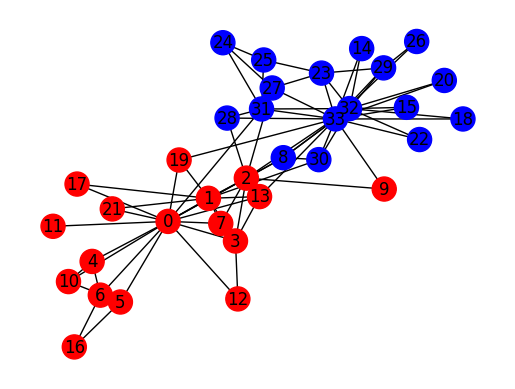

In [28]:
from demo.network_community_detection.utils.utils import (
    draw_communities_from_graph,
)


draw_communities_from_graph(karate_club_problem, solution, " ")

Comparison with Louvain algorithm

In [33]:
karate_communities_cqm = [
    {"x" + str(n) for n in cluster}
    for cluster in communities_from_sample(solution, 2)
]

lcda_communities_xs = [
    {"x" + str(n) for n in cluster} for cluster in lcda_communities
]

print("\nLCDA")
print(f"comm. 0: {lcda_communities_xs[0]}")
print(f"comm. 1: {lcda_communities_xs[1]}")

print("\nCQM")
print(f"comm. 0: {karate_communities_cqm[0]}")
print(f"comm. 1: {karate_communities_cqm[1]}")

print("\nDiff.:")
print(karate_communities_cqm[0].difference(lcda_communities_xs[1]))


LCDA
comm. 0: {'x3', 'x4', 'x17', 'x2', 'x16', 'x0', 'x13', 'x19', 'x21', 'x1', 'x11', 'x6', 'x5', 'x12', 'x10', 'x7'}
comm. 1: {'x22', 'x27', 'x25', 'x24', 'x29', 'x32', 'x26', 'x18', 'x8', 'x9', 'x23', 'x14', 'x28', 'x20', 'x30', 'x31', 'x33', 'x15'}

CQM
comm. 0: {'x22', 'x27', 'x25', 'x24', 'x29', 'x32', 'x26', 'x18', 'x8', 'x28', 'x23', 'x14', 'x30', 'x20', 'x31', 'x33', 'x15'}
comm. 1: {'x3', 'x4', 'x17', 'x2', 'x16', 'x0', 'x13', 'x19', 'x21', 'x1', 'x11', 'x9', 'x6', 'x5', 'x12', 'x10', 'x7'}

Diff.:
set()


The same results produced by DQM and CQM

In [34]:
print("\nDQM")
print(f"comm. 0: {karate_communities_dqm[0]}")
print(f"comm. 1: {karate_communities_dqm[1]}")

print("\nCQM")
print(f"comm. 0: {karate_communities_cqm[0]}")
print(f"comm. 1: {karate_communities_cqm[1]}")

print("\nDiff.:")
print(karate_communities_dqm[1].difference(karate_communities_cqm[0]))
print("Same results")


DQM
comm. 0: {'x3', 'x4', 'x17', 'x2', 'x16', 'x0', 'x13', 'x19', 'x21', 'x1', 'x11', 'x9', 'x6', 'x5', 'x12', 'x10', 'x7'}
comm. 1: {'x22', 'x27', 'x25', 'x24', 'x29', 'x32', 'x26', 'x18', 'x8', 'x28', 'x23', 'x14', 'x30', 'x20', 'x33', 'x31', 'x15'}

CQM
comm. 0: {'x22', 'x27', 'x25', 'x24', 'x29', 'x32', 'x26', 'x18', 'x8', 'x28', 'x23', 'x14', 'x30', 'x20', 'x31', 'x33', 'x15'}
comm. 1: {'x3', 'x4', 'x17', 'x2', 'x16', 'x0', 'x13', 'x19', 'x21', 'x1', 'x11', 'x9', 'x6', 'x5', 'x12', 'x10', 'x7'}

Diff.:
set()
Same results
